In [1]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [5]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
data.shape

(76020, 371)

In [7]:
X = data.drop(columns = ['ID','TARGET'])
X.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,...,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0.30,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [8]:
y = data['TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.2,stratify = y)

In [10]:
x_train.shape

(60816, 369)

In [11]:
data.sum(axis = 0)

ID                         5.774787e+09
var3                      -1.157936e+08
var15                      2.524842e+06
imp_ent_var16_ult1         6.553552e+06
imp_op_var39_comer_ult1    5.501040e+06
                               ...     
saldo_medio_var44_hace3    1.412889e+05
saldo_medio_var44_ult1     5.779509e+06
saldo_medio_var44_ult3     4.303823e+06
var38                      8.912266e+09
TARGET                     3.008000e+03
Length: 371, dtype: float64

In [12]:
filter = VarianceThreshold(0.01)
x_train = filter.fit_transform(x_train)
x_test = filter.transform(x_test)

In [13]:
x_train.shape,x_test.shape

((60816, 273), (15204, 273))

In [14]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

In [15]:
x_train_T = x_train_df.T
x_test_T = x_test_df.T

In [16]:
dup_features = x_train_T.duplicated()

In [17]:
features_to_keep = [not x for x in dup_features]

In [18]:
x_train = x_train_T[features_to_keep].T
x_train.shape

(60816, 256)

In [19]:
x_test = x_test_T[features_to_keep].T
x_test.shape

(15204, 256)

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_train = x_train.reshape(60816, 256,1)
x_test = x_test.reshape(15204, 256,1)

In [22]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(32,3,activation='relu',input_shape = (256,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv1D(64,3,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Conv1D(128,3,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool1D(2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1,activation='sigmoid'))




In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

In [39]:
model.compile(loss = 'binary_crossentropy',optimizer=keras.optimizers.Adam(lr = 0.00005),metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [40]:
history = model.fit(x_train,y_train,epochs = 10,validation_data=(x_test,y_test),verbose = 1)

Epoch 1/10
1901/1901 [==============================] - 13s 6ms/step - loss: 0.2044 - accuracy: 0.9552 - val_loss: 0.1734 - val_accuracy: 0.9589
Epoch 2/10
1901/1901 [==============================] - 12s 6ms/step - loss: 0.1707 - accuracy: 0.9597 - val_loss: 0.1627 - val_accuracy: 0.9603
Epoch 3/10
1901/1901 [==============================] - 13s 7ms/step - loss: 0.1647 - accuracy: 0.9602 - val_loss: 0.1657 - val_accuracy: 0.9603
Epoch 4/10
1901/1901 [==============================] - 12s 7ms/step - loss: 0.1630 - accuracy: 0.9604 - val_loss: 0.1610 - val_accuracy: 0.9603
Epoch 5/10
1901/1901 [==============================] - 12s 6ms/step - loss: 0.1608 - accuracy: 0.9604 - val_loss: 0.1582 - val_accuracy: 0.9605
Epoch 6/10
1901/1901 [==============================] - 12s 6ms/step - loss: 0.1577 - accuracy: 0.9604 - val_loss: 0.1562 - val_accuracy: 0.9604
Epoch 7/10
1901/1901 [==============================] - 12s 6ms/step - loss: 0.1560 - accuracy: 0.9604 - val_loss: 0.1573 - val_ac

In [41]:
history.history

{'accuracy': [0.9552091360092163,
  0.9597309827804565,
  0.9602242708206177,
  0.9604380130767822,
  0.960421621799469,
  0.9604380130767822,
  0.960355818271637,
  0.960372269153595,
  0.960388720035553,
  0.9604380130767822],
 'loss': [0.20443515479564667,
  0.1707495152950287,
  0.16472214460372925,
  0.1629541963338852,
  0.1608411967754364,
  0.15774662792682648,
  0.15603439509868622,
  0.1538103073835373,
  0.15229906141757965,
  0.15093742311000824],
 'val_accuracy': [0.9588924050331116,
  0.9602736234664917,
  0.960339367389679,
  0.9602736234664917,
  0.9604709148406982,
  0.960405170917511,
  0.960339367389679,
  0.960405170917511,
  0.960405170917511,
  0.9602078199386597],
 'val_loss': [0.17344802618026733,
  0.16271045804023743,
  0.1656600832939148,
  0.16096661984920502,
  0.15815898776054382,
  0.15617775917053223,
  0.15732595324516296,
  0.15866240859031677,
  0.16150325536727905,
  0.15829500555992126]}

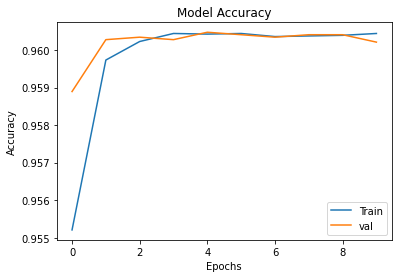

In [42]:
plt.plot(history.history['accuracy'],label = "Train")
plt.plot(history.history['val_accuracy'],label = "val")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


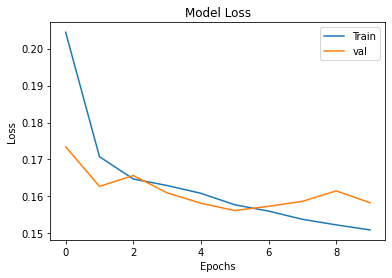

In [43]:
plt.plot(history.history['loss'],label = "Train")
plt.plot(history.history['val_loss'],label = "val")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
